# Question # 1  CNN Implementation:

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


df_train = pd.read_csv('/kaggle/input/signature-verification-dataset/sign_data/train_data.csv')
images = []
labels = []

# Pre-Processing
for index, row in df_train.iterrows():
    img_path = '/kaggle/input/signature-verification-dataset/sign_data/train/' + row[0]  
    label = int(os.path.basename(os.path.dirname(img_path)))  
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (128, 128))  
    images.append(img)
    labels.append(label)


X = np.array(images).reshape(-1, 128, 128, 1) / 255.0  
y = to_categorical(np.array(labels))  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-1-fd97352d5b8d>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_path = '/kaggle/input/signature-verification-dataset/sign_data/train/' + row[0]


In [8]:
# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.2623 - loss: 3.0458 - val_accuracy: 0.9914 - val_loss: 0.1581
Epoch 2/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6932 - loss: 0.8987 - val_accuracy: 0.9994 - val_loss: 0.0243
Epoch 3/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7363 - loss: 0.7656 - val_accuracy: 1.0000 - val_loss: 0.0130
Epoch 4/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7504 - loss: 0.7013 - val_accuracy: 0.9991 - val_loss: 0.0091
Epoch 5/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7607 - loss: 0.6564 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 6/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7773 - loss: 0.6199 - val_accuracy: 0.9987 - val_loss: 0.0059
Epoch 7/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7816 - loss: 0.5986 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 8/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7863 - loss: 0.5913 - val_acc

## Evaluation:

In [9]:
df_test = pd.read_csv('/kaggle/input/signature-verification-dataset/sign_data/test_data.csv')
images = []
labels = []

for index, row in df_test.iterrows():
    img_path = '/kaggle/input/signature-verification-dataset/sign_data/test/' + row[0]  
    label = int(os.path.basename(os.path.dirname(img_path)))  
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    img = cv2.resize(img, (128, 128))  
    images.append(img)
    labels.append(label)

<ipython-input-9-512c3df1160a>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_path = '/kaggle/input/signature-verification-dataset/sign_data/test/' + row[0]  # assuming the first column contains the image path


In [10]:
X = np.array(images).reshape(-1, 128, 128, 1) / 255.0  
y = to_categorical(np.array(labels)) 

In [11]:
test_loss, test_acc = model.evaluate(X, y)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 7.1848e-05
Test Accuracy: 1.0000
Test Loss: 0.0001


In [13]:
import numpy as np

y_pred = model.predict(X)  
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y, axis=1)  


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

          49       1.00      1.00      1.00       276
          50       1.00      1.00      1.00       276
          51       1.00      1.00      1.00       228
          52       1.00      1.00      1.00       324
          53       1.00      1.00      1.00       324
          54       1.00      1.00      1.00       372
          55       1.00      1.00      1.00       276
          56       1.00      1.00      1.00       228
          57       1.00      1.00      1.00       276
          58       1.00      1.00      1.00       324
          59       1.00      1.00      1.00       228
          60       1.00      1.00      1.00       276
          61       1.00      1.00      1.00       276
          62       1.00      1.00      1.00       276
          63       1.00      1.00      1.00       276
          64       1.00      1.00      1.00       228
          65       1.00      1.00      1.00       228
          66       1.00    

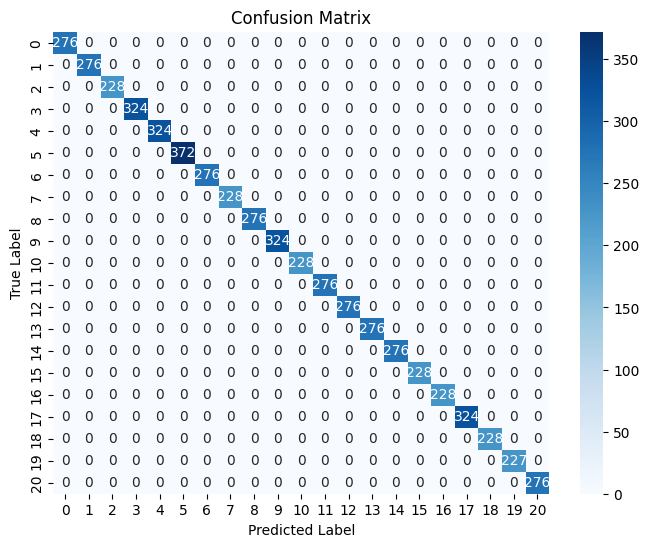

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average="weighted")
recall = recall_score(y_true, y_pred_classes, average="weighted")
f1 = f1_score(y_true, y_pred_classes, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


## Manual Feature Extraction with HOG and SVM:

In [20]:
import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


df_train = pd.read_csv('/kaggle/input/signature-verification-dataset/sign_data/train_data.csv')
images = []
labels = []

# Pre-Processing
for index, row in df_train.iterrows():
    img_path = '/kaggle/input/signature-verification-dataset/sign_data/train/' + row[0] 
    label = int(os.path.basename(os.path.dirname(img_path)))  
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    img = cv2.resize(img, (128, 128))  
    images.append(img)
    labels.append(label)


<ipython-input-20-3865f4d79475>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_path = '/kaggle/input/signature-verification-dataset/sign_data/train/' + row[0]  # assuming the first column contains the image path


In [21]:
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Extracting HOG features for each image
hog_features = []
for img in images:
    feature = hog(img, pixels_per_cell=(16, 16),
                  cells_per_block=(1, 1), feature_vector=True)
    hog_features.append(feature)


X_features = np.array(hog_features)

X_train_feat, X_test_feat, y_train_labels, y_test_labels = train_test_split(X_features, labels, test_size=0.2, random_state=42)


In [22]:
# Training SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train_feat, y_train_labels)


SVC(kernel='linear', probability=True)

## Evaluation:

In [23]:
df_test = pd.read_csv('/kaggle/input/signature-verification-dataset/sign_data/test_data.csv')

images = []
labels = []

for index, row in df_test.iterrows():
    img_path = '/kaggle/input/signature-verification-dataset/sign_data/test/' + row[0]  
    label = int(os.path.basename(os.path.dirname(img_path)))  
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    img = cv2.resize(img, (128, 128))  
    images.append(img)
    labels.append(label)

<ipython-input-23-a341129a3222>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_path = '/kaggle/input/signature-verification-dataset/sign_data/test/' + row[0]  # assuming the first column contains the image path


In [24]:
X = np.array(images).reshape(-1, 128, 128, 1) / 255.0  
y = to_categorical(np.array(labels))  

In [5]:
# Predicting and evaluating
y_pred = clf.predict(X_test_feat)
print("Manual Feature Extraction with HOG and SVM: Evaluation")
print("Accuracy:", accuracy_score(y_test_labels, y_pred))
print("Precision:", precision_score(y_test_labels, y_pred, average='macro'))
print("Recall:", recall_score(y_test_labels, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test_labels, y_pred, average='macro'))

Manual Feature Extraction with HOG and SVM: Evaluation
Accuracy: 0.861
Precision: 0.854
Recall: 0.86
F1 Score: 0.854


# Question # 2 Word Completion using LSTM:

In [2]:
import pandas as pd
import numpy as np
import re, string, os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


df = pd.read_csv('/kaggle/input/shakespeare-plays/Shakespeare_data.csv')  

text_data = df.iloc[:, 5].tolist()

In [3]:
def clean_text(text):
    """Lowercase, removing punctuation, and extra whitespace."""
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


cleaned_texts = [clean_text(line) for line in text_data]
corpus = " ".join(cleaned_texts)

In [4]:
# Tokenizing and Creating Sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
total_words = len(tokenizer.word_index) + 1
print("Total words:", total_words)

Total words: 27382


In [5]:
# Making sequence length of 5 along with next word as target
sequence_length = 5
tokens = tokenizer.texts_to_sequences([corpus])[0]

input_sequences = []
for i in range(sequence_length, len(tokens)):
    n_gram_sequence = tokens[i-sequence_length:i+1]  
    input_sequences.append(n_gram_sequence)

print("Number of sequences:", len(input_sequences))

Number of sequences: 814638


In [6]:
input_sequences = np.array(input_sequences)

X = input_sequences[:, :-1]  
y = input_sequences[:, -1]   

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# LSTM Model Architecture
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=sequence_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dense(total_words, activation='softmax')
])

# Using sparse categorical crossentropy 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

model.save("word_completion_lstm50.h5")

import pickle
with open('tokenizer50.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

Epoch 1/50
22912/22912 ━━━━━━━━━━━━━━━━━━━━ 338s 15ms/step - accuracy: 0.0517 - loss: 6.8120 - val_accuracy: 0.0921 - val_loss: 6.2583
Epoch 2/50
22912/22912 ━━━━━━━━━━━━━━━━━━━━ 335s 15ms/step - accuracy: 0.0959 - loss: 6.0864 - val_accuracy: 0.1016 - val_loss: 6.1280
Epoch 3/50
22912/22912 ━━━━━━━━━━━━━━━━━━━━ 335s 15ms/step - accuracy: 0.1062 - loss: 5.8784 - val_accuracy: 0.1073 - val_loss: 6.1071
Epoch 4/50
22912/22912 ━━━━━━━━━━━━━━━━━━━━ 335s 15ms/step - accuracy: 0.1142 - loss: 5.7445 - val_accuracy: 0.1096 - val_loss: 6.0986
Epoch 5/50
22912/22912 ━━━━━━━━━━━━━━━━━━━━ 335s 15ms/step - accuracy: 0.1206 - loss: 5.6214 - val_accuracy: 0.1110 - val_loss: 6.1194
Epoch 6/50
22912/22912 ━━━━━━━━━━━━━━━━━━━━ 335s 15ms/step - accuracy: 0.1236 - loss: 5.5321 - val_accuracy: 0.1117 - val_loss: 6.1372
Epoch 7/50
22912/22912 ━━━━━━━━━━━━━━━━━━━━ 335s 15ms/step - accuracy: 0.1309 - loss: 5.4338 - val_accuracy: 0.1107 - val_loss: 6.1798
Epoch 8/50
22912/22912 ━━━━━━━━━━━━━━━━━━━━ 335s 15ms/s

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 5, 100)              │       2,738,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 128)              │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 27382)               │       3,532,278 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,557,932 (74.61 MB)

 Trainable params: 6,519,310 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,038,622 (49.74 MB)

## Streamlit User Interface:

In [ ]:
%%writefile streamlit_app.py

import streamlit as st
import numpy as np
import pickle
import re, string

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences


model = load_model("/kaggle/working/word_completion_lstm.h5")
with open('/kaggle/working/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

sequence_length = 5

def clean_text(text):
    """Lowercase, removing punctuation, and extra whitespace."""
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def predict_next_word(text):
    """Given a partial sentence, predicting the next word."""
    text_clean = clean_text(text)
    
    tokens = tokenizer.texts_to_sequences([text_clean])[0]
    
    # If user input is longer than sequence_length, considering only the last sequence_length words
    tokens = tokens[-sequence_length:]
    
    # Padding sequence to match the required length
    padded = pad_sequences([tokens], maxlen=sequence_length, padding='pre')
    
    predicted_probs = model.predict(padded)
    predicted_index = np.argmax(predicted_probs, axis=1)[0]
    
    # Finding the word corresponding to predicted_index
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            return word
    return ""


# Streamlit Interface
st.title("Word Completion using LSTM")
st.write("Type a partial sentence below, and the model will suggest the next word in real-time.")

user_input = st.text_input("Enter a partial sentence:")

if user_input:
    next_word = predict_next_word(user_input)
    st.write("### Suggested Next Word:")
    st.write(next_word)


Writing streamlit_app.py


In [15]:
!pip install pyngrok
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 60.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.7 MB/s eta 0:00:00:00:0100:01


In [16]:
!ngrok authtoken 2jb86JKOHKjdCaoHKnPIeqPbJJ9_6Zrx6tHZQeLacbEwNFuCQ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [17]:
from pyngrok import ngrok

public_url = ngrok.connect(8000)

print("Ngrok public URL:", public_url)

Ngrok public URL: NgrokTunnel: "https://5755-34-60-133-45.ngrok-free.app" -> "http://localhost:8000"


In [18]:
!streamlit run streamlit_app.py --server.port 8000




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8000
  Network URL: http://172.19.2.2:8000
  External URL: http://34.60.133.45:8000

2025-03-16 12:28:52.480638: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-16 12:28:52.509162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-16 12:28:52.517696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1742128135.111608    1344 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer